In [1]:
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import seaborn as sns

import numpy as np

In [2]:
import pickle
asym_0x0=pickle.load(open("0x0A_diamond_asymmetry.p", "rb" ))
asym_2x0=pickle.load(open("2x0_diamond_asymmetry.p", "rb" ))
asym_2x6=pickle.load(open("2x6_diamond_asymmetry.p", "rb" ))
asym_2x9=pickle.load(open("2x9_diamond_asymmetry.p", "rb" ))


In [3]:
T_0x0=asym_0x0['Temp']
a_0x0=asym_0x0['asym_NW_SE']
print(a_0x0.shape)
a_0x0_mean=np.mean(a_0x0,axis=0)
a_0x0_std=np.std(a_0x0,axis=0)

T_2x0=asym_2x0['Temp']
a_2x0=asym_2x0['asym_NW_SE']
print(a_2x0.shape)
a_2x0_mean=np.mean(a_2x0,axis=0)
a_2x0_std=np.std(a_2x0,axis=0)


T_2x6=asym_2x6['Temp']
a_2x6=asym_2x6['asym_NW_SE']
print(a_2x6.shape)
a_2x6_mean=np.mean(a_2x6,axis=0)
a_2x6_std=np.std(a_2x6,axis=0)


T_2x9=asym_2x9['Temp']
a_2x9=asym_2x9['asym_NW_SE']
print(a_2x9.shape)
a_2x9_mean=np.mean(a_2x9,axis=0)
a_2x9_std=np.std(a_2x9,axis=0)




(10, 19)
(10, 29)
(10, 17)
(10, 13)


In [4]:
import colorsys
from matplotlib import colors
def scale_lightness(rgb, scale_l):
     # convert rgb to hls
     h, l, s = colorsys.rgb_to_hls(*rgb)
     # manipulate h, l, s values and return as rgb
     return colorsys.hls_to_rgb(h, min(1, l * scale_l), s = s)
color = colors.ColorConverter.to_rgb("purple")
m0 = scale_lightness(color, 0.7)        # a lighter shade of skyblue
m1 = scale_lightness(color, 1.0)        # a lighter shade of skyblue
m2 =scale_lightness(color, 1.2)        # a lighter shade of skyblue
m3 =scale_lightness(color, 2.0)        # a lighter shade of skyblue
m4 =scale_lightness(color, 3.0)        # a lighter shade of skyblue



color_list=['goldenrod', 'purple',  m3,m4]


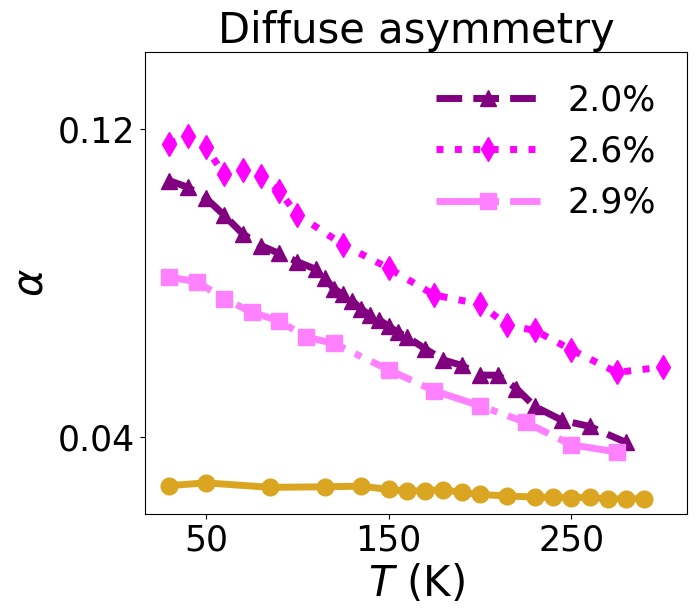

In [5]:
plt.figure(figsize=(7,6))

x=T_0x0
y=a_0x0_mean
dy=a_0x0_std

plt.plot(x,y,lw=5,marker='o',markersize=12,color=color_list[0])

#plt.gca().fill_between(x, y-dy,y+dy,alpha=0.1)


x=T_2x0
y=a_2x0_mean
dy=a_2x0_std
plt.plot(x,y,lw=5,linestyle='--',marker='^',markersize=12,label=r'2.0%',color=color_list[1])
#plt.gca().fill_between(x, y-dy,y+dy,alpha=0.1)

x=T_2x6
y=a_2x6_mean
dy=a_2x6_std
plt.plot(x,y,lw=5,linestyle=':',marker='d',markersize=12,label=r'2.6%',color=color_list[2])
#plt.gca().fill_between(x, y-dy,y+dy,alpha=0.1)


x=T_2x9
y=-a_2x9_mean
dy=a_2x9_std
plt.plot(x,y,lw=5,marker='s',linestyle='-.',markersize=12,label=r'2.9%',color=color_list[3])
#plt.gca().fill_between(x, y-dy,y+dy,alpha=0.1)

plt.ylabel(r"$\alpha$",size=30)
plt.xlabel(r"$T$ (K)",size=30)
plt.xticks(np.arange(50,300,100), fontsize=25);
plt.yticks(np.arange(0.04,0.13,0.08), fontsize=25);
plt.title(r'Diffuse asymmetry',size=30)

plt.ylim([0.02,0.14])

plt.legend(handlelength=3,fontsize=25,frameon=False)

plt.savefig(r'Diffuse_asym_ratio.svg',bbox_inches='tight',transparent='True')
